In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [3]:
len(airQ_data)

61776

In [4]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [5]:
len(airQ_data_mean)

1011

In [6]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [7]:
len(airQ_data_mean)

1011

In [8]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [9]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [10]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998], dtype=int64)

In [11]:
airQ_data_mean

,state_name,Week,Year,avg_aqi
0,California,1,1999,92.500000
1,California,1,2000,75.437500
2,California,1,2001,87.254457
3,California,1,2002,61.261568
4,California,1,2003,55.143505
...,...,...,...,...
1006,California,53,2017,78.873386
1007,California,54,2000,130.863636
1008,California,54,2006,83.514493
1009,California,54,2012,63.000000


In [12]:
#we will use this influenza data
influenza_data = pd.read_csv('../Datasets/Disease cases/influenza/AgeViewByWeek_Influenza.csv', low_memory=False)
influenza_data.head()

,Year,Week,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,2019,40,(0-4)yr,0,0,4,3,4,6,0,1,0
1,2019,41,(0-4)yr,0,0,2,5,3,15,0,0,0
2,2019,42,(0-4)yr,0,0,14,3,0,15,0,4,0
3,2019,43,(0-4)yr,0,0,4,4,0,12,0,3,0
4,2019,44,(0-4)yr,0,0,7,6,0,12,1,0,0


In [13]:
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [14]:
influenza_data['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997], dtype=int64)

In [15]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,influenza_data,how='inner', left_on=['Year', 'Week'], right_on=['Year','Week'])

In [16]:
len(merged)

3944

In [17]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


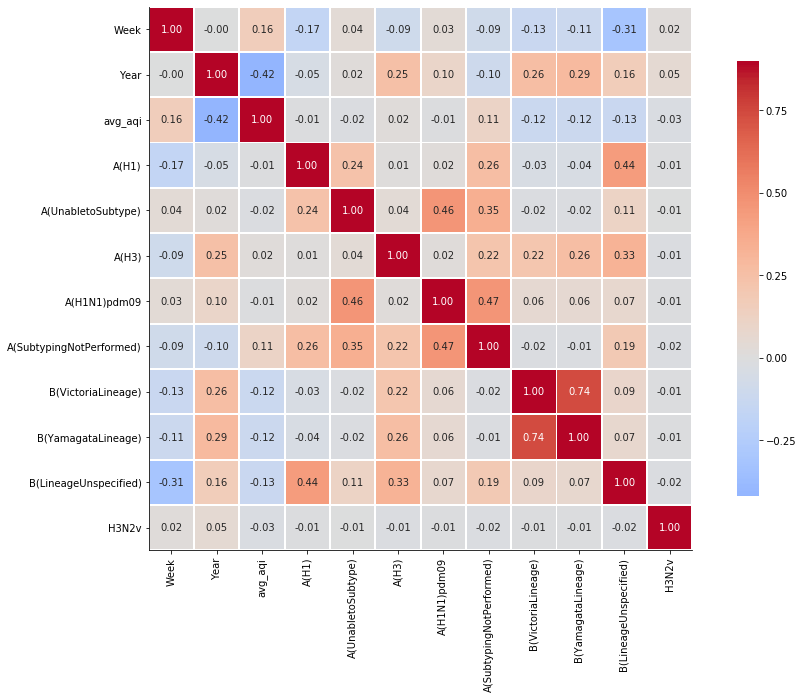

In [18]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [19]:
merged_filtered = merged[merged['AgeGroup'] == '(25-64)yr']
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [20]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
6,California,1,2000,75.437500,(25-64)yr,0,0,132,0,80,0,0,0,0
10,California,1,2001,87.254457,(25-64)yr,36,0,1,0,6,0,0,31,0
14,California,1,2002,61.261568,(25-64)yr,0,0,33,0,7,0,0,1,0
18,California,1,2003,55.143505,(25-64)yr,13,0,4,0,1,0,0,6,0


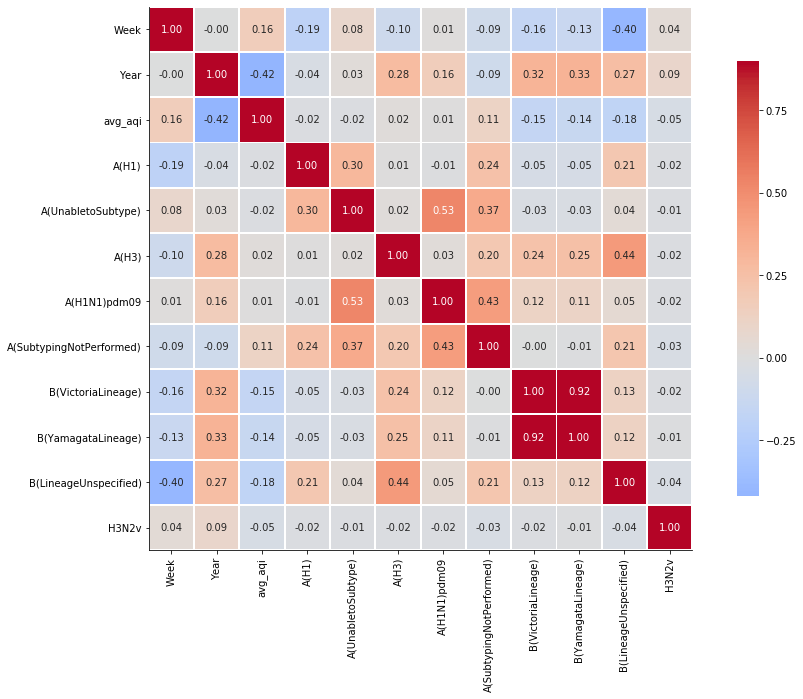

In [21]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

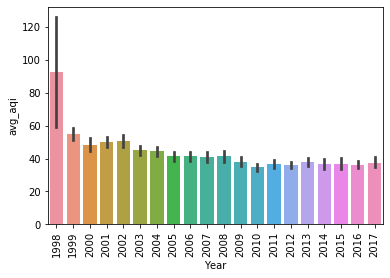

In [22]:
sns.barplot(x='Year', y='avg_aqi', data=merged_filtered, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

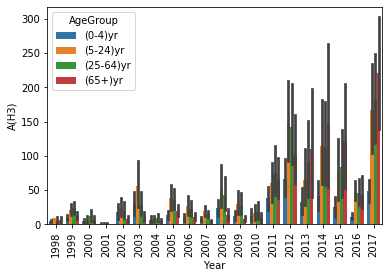

In [23]:
sns.barplot(x='Year', y='A(H3)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

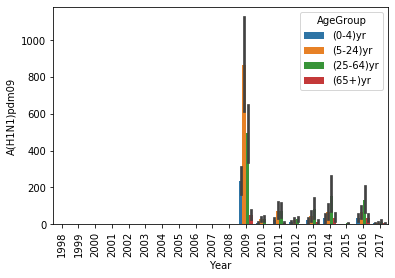

In [24]:
sns.barplot(x='Year', y='A(H1N1)pdm09', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

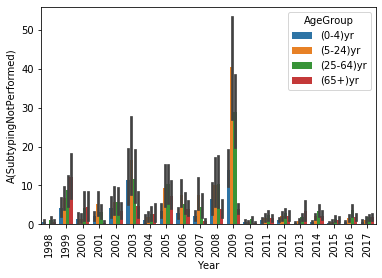

In [25]:
sns.barplot(x='Year', y='A(SubtypingNotPerformed)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


In [26]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


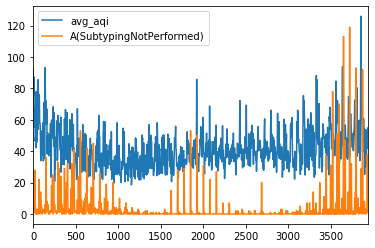

In [27]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(0-4)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

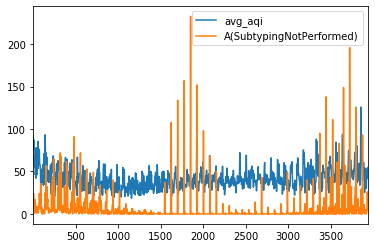

In [28]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(5-24)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

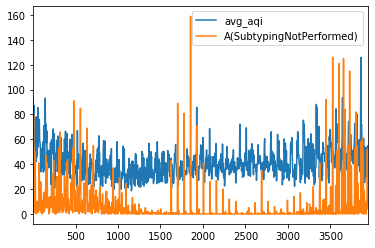

In [29]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

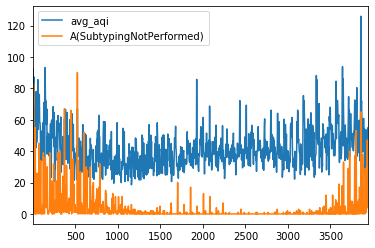

In [30]:
#plotting AQ index value vs. Virus vs age group
merged_filtered=merged[merged['AgeGroup'] == '(65+)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5, 2020. ]), <a list of 11 Text xticklabel objects>)

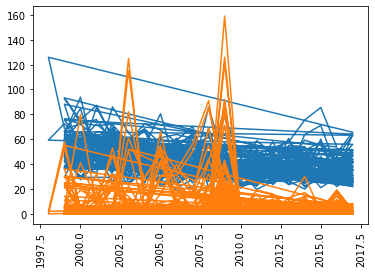

In [31]:
plt.figure()

merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']


x = merged_filtered['Year']
y1 = merged_filtered['avg_aqi'] 
y2 = merged_filtered['A(SubtypingNotPerformed)']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

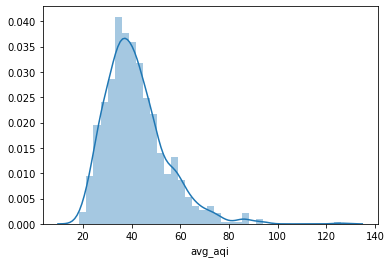

In [32]:
sns.distplot(merged_filtered['avg_aqi'])
plt.show()

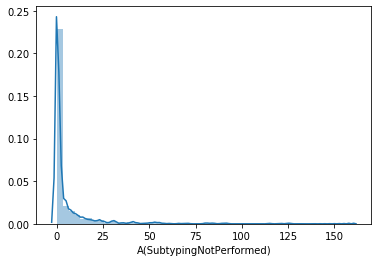

In [33]:
sns.distplot(merged_filtered['A(SubtypingNotPerformed)'])
plt.show()

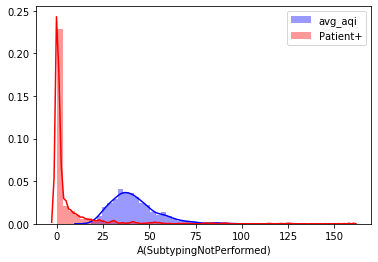

In [34]:
# Method 1: on the same Axis
sns.distplot( (merged_filtered["avg_aqi"]) , color="blue", label="avg_aqi")
sns.distplot( merged_filtered["A(SubtypingNotPerformed)"] , color="red", label="Patient+")
plt.legend()
 
plt.show()


In [35]:
merged.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.5000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.5000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.5000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.5000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.4375,(0-4)yr,1,0,47,0,27,0,0,0,0


In [36]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [37]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'AgeGroup', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v'],
      dtype='object')

In [38]:
1. #with Target Virus = A(SubtypingNotPerformed)

1.0

In [39]:
#X and Y(target) for linear regression
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )


In [40]:
# Creating linear regression model.
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print(lr_model.intercept_)
print(lr_model.coef_)

Training score%:  40.738516088018116 %
Test score:  21.9187625835941 %
RMSE: 9.768412704324444
[892.84481595]
[[-0.06438368 -0.44383828  0.04593622  0.14344316  0.74991538  0.02798821
   0.03463367 -0.04820623 -0.03287299 -0.0034386   0.03438339]]


In [41]:
#for individual age group 
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [42]:
#X and Y(target) for linear regression-individual age group 
Y_trainData = trainData[['A(SubtypingNotPerformed)']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(SubtypingNotPerformed)']]
X_testData= testData.drop(['state_name','AgeGroup','A(SubtypingNotPerformed)'], axis =1 )

In [43]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

Training score%:  32.03051192168361 %
Test score:  37.59417144130437 %
RMSE: 13.169440258002954
intercept: [1115.41710128]
coef [[ 0.01277052 -0.55652329  0.0730069   0.14381185  0.49667608  0.02033681
   0.0260189   0.12846431 -0.05151471  0.08143427  0.94706165]]


In [44]:
#creating polynomial features--individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_trainData, Y_trainData)

print('Training score%: ',pipeline.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',pipeline.score(X_testData, Y_testData)*100, '%')
# Testing score has decreased due to overfitting

Training score%:  85.97305343366507 %
Test score:  -34.611589104059746 %


In [45]:
#l2 Regularization or Ridge Regression-alpha value =50-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=50, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  74.65792204978776 %
Test score:  52.01417638912291 %
RMSE: 13.169440258002954


In [46]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  78.84676768031052 %
Test score:  57.183529404372344 %
RMSE: 13.169440258002954


In [47]:
2. #with Target Virus = A(H1N1)pdm09

2.0

In [48]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

#X and Y(target) for linear regression-combined age group 
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(H1N1)pdm09']]
X_testData= testData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )


In [49]:
# Creating linear regression model.-combined age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print(lr_model.intercept_)
print(lr_model.coef_)

Training score%:  39.72149560453185 %
Test score:  31.21165241224957 %
RMSE: 129.85435564481924
[-10760.46652854]
[[ 0.54044155  5.34888089  0.4244501  -1.54353534 28.34071895 -0.22420033
   6.11825589  1.68070471  0.31076427  0.26858919 -1.48845689]]


In [50]:
#for individual age group 
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)


In [51]:
#X and Y(target) for linear regression- 
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['A(H1N1)pdm09']]
X_testData= testData.drop(['state_name','AgeGroup','A(H1N1)pdm09'], axis =1 )

In [52]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

Training score%:  40.22293724324939 %
Test score:  48.4057703194071 %
RMSE: 158.0407140843812
intercept: [-17218.33072665]
coef [[ -1.42421105   8.58175172   1.4649795   -3.43529968  39.49202673
   -0.23163596   4.60979999   4.76394783  -0.15979991   0.18365765
  -32.03734626]]


In [53]:
#l2 Regularization or Ridge Regression-alpha value =10-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  80.24793548706543 %
Test score:  54.5789288133153 %
RMSE: 158.0407140843812


In [54]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  81.3576600659263 %
Test score:  64.48065456898466 %
RMSE: 158.0407140843812


c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645282.521094946, tolerance: 3019.3341421739183
  positive)


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [98]:
merged_var=merged[(merged['Week'] < 13) & (merged['AgeGroup'] == '(25-64)yr')] 
merged_var.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v,NewMonth
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0,1999-1
6,California,1,2000,75.437500,(25-64)yr,0,0,132,0,80,0,0,0,0,2000-1
10,California,1,2001,87.254457,(25-64)yr,36,0,1,0,6,0,0,31,0,2001-1
14,California,1,2002,61.261568,(25-64)yr,0,0,33,0,7,0,0,1,0,2002-1
18,California,1,2003,55.143505,(25-64)yr,13,0,4,0,1,0,0,6,0,2003-1


In [90]:
merged_var.columns

Index(['avg_aqi', 'A(H1)', 'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v', 'NewMonth'],
      dtype='object')

In [99]:
merged_var["NewMonth"] = merged_var["Year"].astype(str).map(str) +"-" +merged_var["Week"].astype(str)
merged_var= merged_var.drop(['state_name', 'Week', 'Year','AgeGroup','H3N2v'], axis =1 )
merged_var.head()

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),NewMonth
2,92.500000,0,0,29,0,5,0,0,12,1999-1
6,75.437500,0,0,132,0,80,0,0,0,2000-1
10,87.254457,36,0,1,0,6,0,0,31,2001-1
14,61.261568,0,0,33,0,7,0,0,1,2002-1
18,55.143505,13,0,4,0,1,0,0,6,2003-1


In [100]:
#setting the new month as index
merged_var.NewMonth = pd.to_datetime(merged_var["NewMonth"])
merged_var.set_index('NewMonth', inplace=True)

IndexError: index 9 is out of bounds for axis 0 with size 9

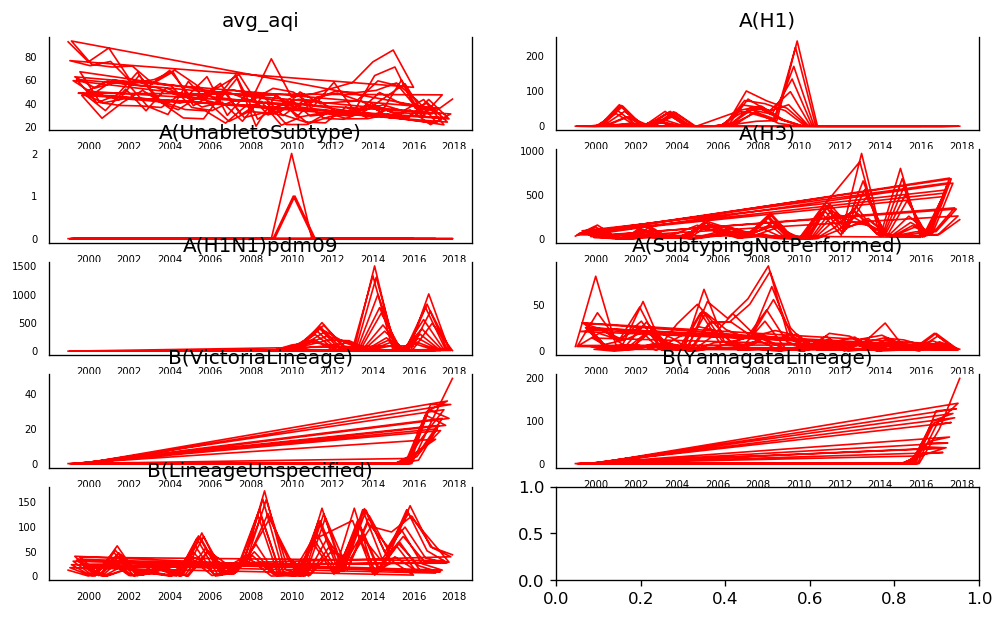

In [101]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merged_var[merged_var.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merged_var.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [102]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    merged_var = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in merged_var.columns:
        for r in merged_var.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            merged_var.loc[r, c] = min_p_value
    merged_var.columns = [var + '_x' for var in variables]
    merged_var.index = [var + '_y' for var in variables]
    return merged_var

grangers_causation_matrix(merged_var, variables = merged_var.columns)   

#avg_aqi_x causing A(H1N1)pdm09_y with p-val = .0074

#So, how to interpret the p-values?
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#Grangers Causality test

,avg_aqi_x,A(H1)_x,A(UnabletoSubtype)_x,A(H3)_x,A(H1N1)pdm09_x,A(SubtypingNotPerformed)_x,B(VictoriaLineage)_x,B(YamagataLineage)_x,B(LineageUnspecified)_x
avg_aqi_y,1.0000,0.0001,0.0000,0.0000,0.0000,0.0004,0.0002,0.0009,0.0000
A(H1)_y,0.0000,1.0000,0.5353,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A(UnabletoSubtype)_y,0.0000,0.2202,1.0000,0.2618,0.5156,0.0000,0.6321,0.6314,0.1663
A(H3)_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A(H1N1)pdm09_y,0.0074,0.0000,0.0000,0.0000,1.0000,0.0000,0.0063,0.0061,0.0000
A(SubtypingNotPerformed)_y,0.0010,0.0001,0.0134,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
B(VictoriaLineage)_y,0.0002,0.0000,0.6550,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
B(YamagataLineage)_y,0.0003,0.0000,0.7771,0.0000,0.0000,0.0000,0.7208,1.0000,0.0000
B(LineageUnspecified)_y,0.0000,0.0000,0.0224,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [103]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(merged_var)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
avg_aqi ::  578.66    > 179.5199  =>   True
A(H1)  ::  347.07    > 143.6691  =>   True
A(UnabletoSubtype) ::  243.89    > 111.7797  =>   True
A(H3)  ::  162.99    > 83.9383   =>   True
A(H1N1)pdm09 ::  100.35    > 60.0627   =>   True
A(SubtypingNotPerformed) ::  67.09     > 40.1749   =>   True
B(VictoriaLineage) ::  36.36     > 24.2761   =>   True
B(YamagataLineage) ::  10.15     > 12.3212   =>   False
B(LineageUnspecified) ::  0.46      > 4.1296    =>   False


In [104]:
trainData, testData = train_test_split(merged_var, train_size=0.7, random_state=100)
Y_trainData = trainData[['A(H1N1)pdm09']]
X_trainData= trainData.drop(['A(H1N1)pdm09'], axis =1 )
X_trainData.head()

,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified)
NewMonth,,,,,,,,
2012-10-01,26.894916,0,0,310,15,0,0,13
2007-01-01,48.906338,42,0,5,1,0,0,5
2011-02-01,37.651861,0,0,298,9,0,0,65
2011-07-01,31.965120,0,0,397,19,0,0,137
2012-07-01,33.353505,0,0,140,16,0,0,10


In [105]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [106]:
# ADF Test on each column
for name, column in trainData.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.937
 No. Lags Chosen       = 3
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.6969
 No. Lags Chosen       = 0
 Critical value 1%     = -3.473
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [107]:
# 1st difference
df_differenced = trainData.diff().dropna()

In [108]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7472
 No. Lags Chosen       = 11
 Critical value 1%     = -3.477
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7756
 No. Lags Chosen       = 14
 Critical value 1%     = -3.478
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [109]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [110]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6037
 No. Lags Chosen       = 12
 Critical value 1%     = -3.477
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(H1)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1141
 No. Lags Chosen       = 14
 Critical value 1%     = -3.478
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A(UnabletoSubtype)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [111]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  60.894064552683346
BIC :  62.66890698266534
FPE :  2.7968649250022703e+26
HQIC:  61.61500108664646 

Lag Order = 2
AIC :  58.60298780578623
BIC :  61.98994783557777
FPE :  2.857532399559019e+25
HQIC:  59.97882707665111 

Lag Order = 3
AIC :  57.23787091584545
BIC :  62.25114651619585
FPE :  7.494105497521617e+24
HQIC:  59.274437588154846 

Lag Order = 4
AIC :  56.6102530333653
BIC :  63.264254262897545
FPE :  4.219878790213593e+24
HQIC:  59.31345406534619 

Lag Order = 5
AIC :  55.9832448184447
BIC :  64.29259823015036
FPE :  2.4712310502489344e+24
HQIC:  59.359070990155814 

Lag Order = 6
AIC :  55.47245319683297
BIC :  65.45200636087996
FPE :  1.7152220837469823e+24
HQIC:  59.52698067131058 

Lag Order = 7
AIC :  55.306911103840775
BIC :  66.9717372503822
FPE :  1.8094272715704032e+24
HQIC:  60.04630302194411 

Lag Order = 8
AIC :  54.357122045655906
BIC :  67.7225248314629
FPE :  9.630657261381541e+23
HQIC:  59.787630155319825 

Lag Order = 9
AIC :  54.141524473

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [112]:
#train the var model of selected order

model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Dec, 2019
Time:                     18:47:36
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    66.9717
Nobs:                     148.000    HQIC:                   60.0463
Log likelihood:          -5406.74    FPE:                1.80943e+24
AIC:                      55.3069    Det(Omega_mle):     7.12646e+22
--------------------------------------------------------------------
Results for equation avg_aqi
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.286340         1.606554            0.178           0.859
L1.avg_aqi                         -1.287811         0.125893          -10.229           0.000
L1

In [115]:
def adjust(val, length= 6): return str(val).ljust(length)

In [116]:
#serial corerelation

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(merged_var.columns, out):
    print(adjust(col), ':', round(val, 2))

avg_aqi : 2.15
A(H1)  : 2.14
A(UnabletoSubtype) : 2.16
A(H3)  : 2.05
A(H1N1)pdm09 : 2.1
A(SubtypingNotPerformed) : 1.89
B(VictoriaLineage) : 2.12
B(YamagataLineage) : 2.13
B(LineageUnspecified) : 2.01


In [117]:
#forcast VAR using stat model

# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

7


array([[  35.48308984,  -25.        ,    0.        ,  -41.        ,
           0.        ,  -69.        ,    0.        ,    0.        ,
          46.        ],
       [  -6.41349584,  -19.        ,    0.        ,  123.        ,
           0.        ,   78.        ,    0.        ,    0.        ,
          43.        ],
       [ -17.18776923,   35.        ,    0.        ,  156.        ,
          49.        , -110.        ,    0.        ,    0.        ,
         -19.        ],
       [  26.63714912,    1.        ,    0.        , -762.        ,
         -16.        ,   62.        ,    0.        ,    0.        ,
        -136.        ],
       [ -16.96251391,   -2.        ,    0.        ,  559.        ,
         -90.        ,   -1.        ,    0.        ,    0.        ,
         112.        ],
       [  -5.81420218,   36.        ,    0.        , -157.        ,
          32.        ,    3.        ,    0.        ,    0.        ,
          -1.        ],
       [   6.74696058,  -34.        ,   

In [123]:
merged_var.head()

,avg_aqi,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified)
NewMonth,,,,,,,,,
1999-01-01,92.500000,0,0,29,0,5,0,0,12
2000-01-01,75.437500,0,0,132,0,80,0,0,0
2001-01-01,87.254457,36,0,1,0,6,0,0,31
2002-01-01,61.261568,0,0,33,0,7,0,0,1
2003-01-01,55.143505,13,0,4,0,1,0,0,6


In [128]:
#forcast

# Forecast
nobs=225
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=merged_var.index[-nobs:], columns=merged_var.columns + '_2d')
df_forecast

,avg_aqi_2d,A(H1)_2d,A(UnabletoSubtype)_2d,A(H3)_2d,A(H1N1)pdm09_2d,A(SubtypingNotPerformed)_2d,B(VictoriaLineage)_2d,B(YamagataLineage)_2d,B(LineageUnspecified)_2d
NewMonth,,,,,,,,,
1999-01-01,12.183631,-32.739510,-0.034876,-111.795706,-20.010614,-21.739943,-5.545355,-11.689667,-9.006205
2000-01-01,0.834688,62.258635,0.032541,113.496496,78.770637,46.241223,7.043937,12.626051,-65.990576
2001-01-01,-14.703884,-78.320864,-0.040012,-19.413991,16.013654,-60.185982,-8.137417,-21.574741,62.183959
2002-01-01,-3.820629,86.536877,0.039133,13.398865,-11.505949,37.031007,10.915504,32.413330,-15.256836
2003-01-01,4.895407,-40.807551,-0.083255,-218.578907,-53.765460,-10.676233,-2.005872,-9.022465,-11.906956
...,...,...,...,...,...,...,...,...,...
2013-12-01,0.025363,0.015656,-0.000176,-0.028854,0.301085,-0.040096,-0.004812,-0.014565,-0.093856
2014-12-01,0.025232,0.015678,-0.000177,-0.029413,0.300873,-0.040218,-0.004849,-0.014646,-0.093862
2015-12-01,0.025322,0.015952,-0.000176,-0.029564,0.301350,-0.040074,-0.004805,-0.014510,-0.093771


In [129]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [130]:
df_forecast.columns

Index(['avg_aqi_2d', 'A(H1)_2d', 'A(UnabletoSubtype)_2d', 'A(H3)_2d',
       'A(H1N1)pdm09_2d', 'A(SubtypingNotPerformed)_2d',
       'B(VictoriaLineage)_2d', 'B(YamagataLineage)_2d',
       'B(LineageUnspecified)_2d'],
      dtype='object')

In [132]:
df_results = invert_transformation(trainData, df_forecast, second_diff=True)        
df_results.loc[:, ['avg_aqi_forecast', 'A(H1)_forecast', 'A(UnabletoSubtype)_forecast', 'A(H3)_forecast',
       'A(H1N1)pdm09_forecast', 'A(SubtypingNotPerformed)_forecast',
       'B(VictoriaLineage)_forecast', 'B(YamagataLineage)_forecast',
       'B(LineageUnspecified)_forecast']]

,avg_aqi_forecast,A(H1)_forecast,A(UnabletoSubtype)_forecast,A(H3)_forecast,A(H1N1)pdm09_forecast,A(SubtypingNotPerformed)_forecast,B(VictoriaLineage)_forecast,B(YamagataLineage)_forecast,B(LineageUnspecified)_forecast
NewMonth,,,,,,,,,
1999-01-01,54.265096,4.260490,-0.034876,-76.795706,-20.010614,-18.739943,-5.545355,-11.689667,45.993795
2000-01-01,67.272636,34.779614,-0.037210,-63.094916,38.749410,6.761338,-4.046773,-10.753282,-7.002986
2001-01-01,65.576291,-13.022125,-0.079557,-68.808116,113.523088,-27.923364,-10.685609,-31.391639,2.184193
2002-01-01,60.059318,25.713013,-0.082771,-61.122451,176.790817,-25.577057,-6.408940,-19.616665,-3.885464
2003-01-01,59.437751,23.640600,-0.169240,-272.015694,186.293086,-33.906984,-4.138143,-16.864157,-21.862078
...,...,...,...,...,...,...,...,...,...
2013-12-01,1306.033130,542.243304,-7.395408,-8195.570693,10114.883580,-2190.671793,-336.704695,-1036.077686,-3370.806463
2014-12-01,1314.518906,546.371509,-7.448349,-8235.940899,10193.878387,-2205.025448,-338.751152,-1042.349914,-3396.566930
2015-12-01,1323.030003,550.515666,-7.501466,-8276.340670,10273.174544,-2219.419176,-340.802412,-1048.636651,-3422.421169


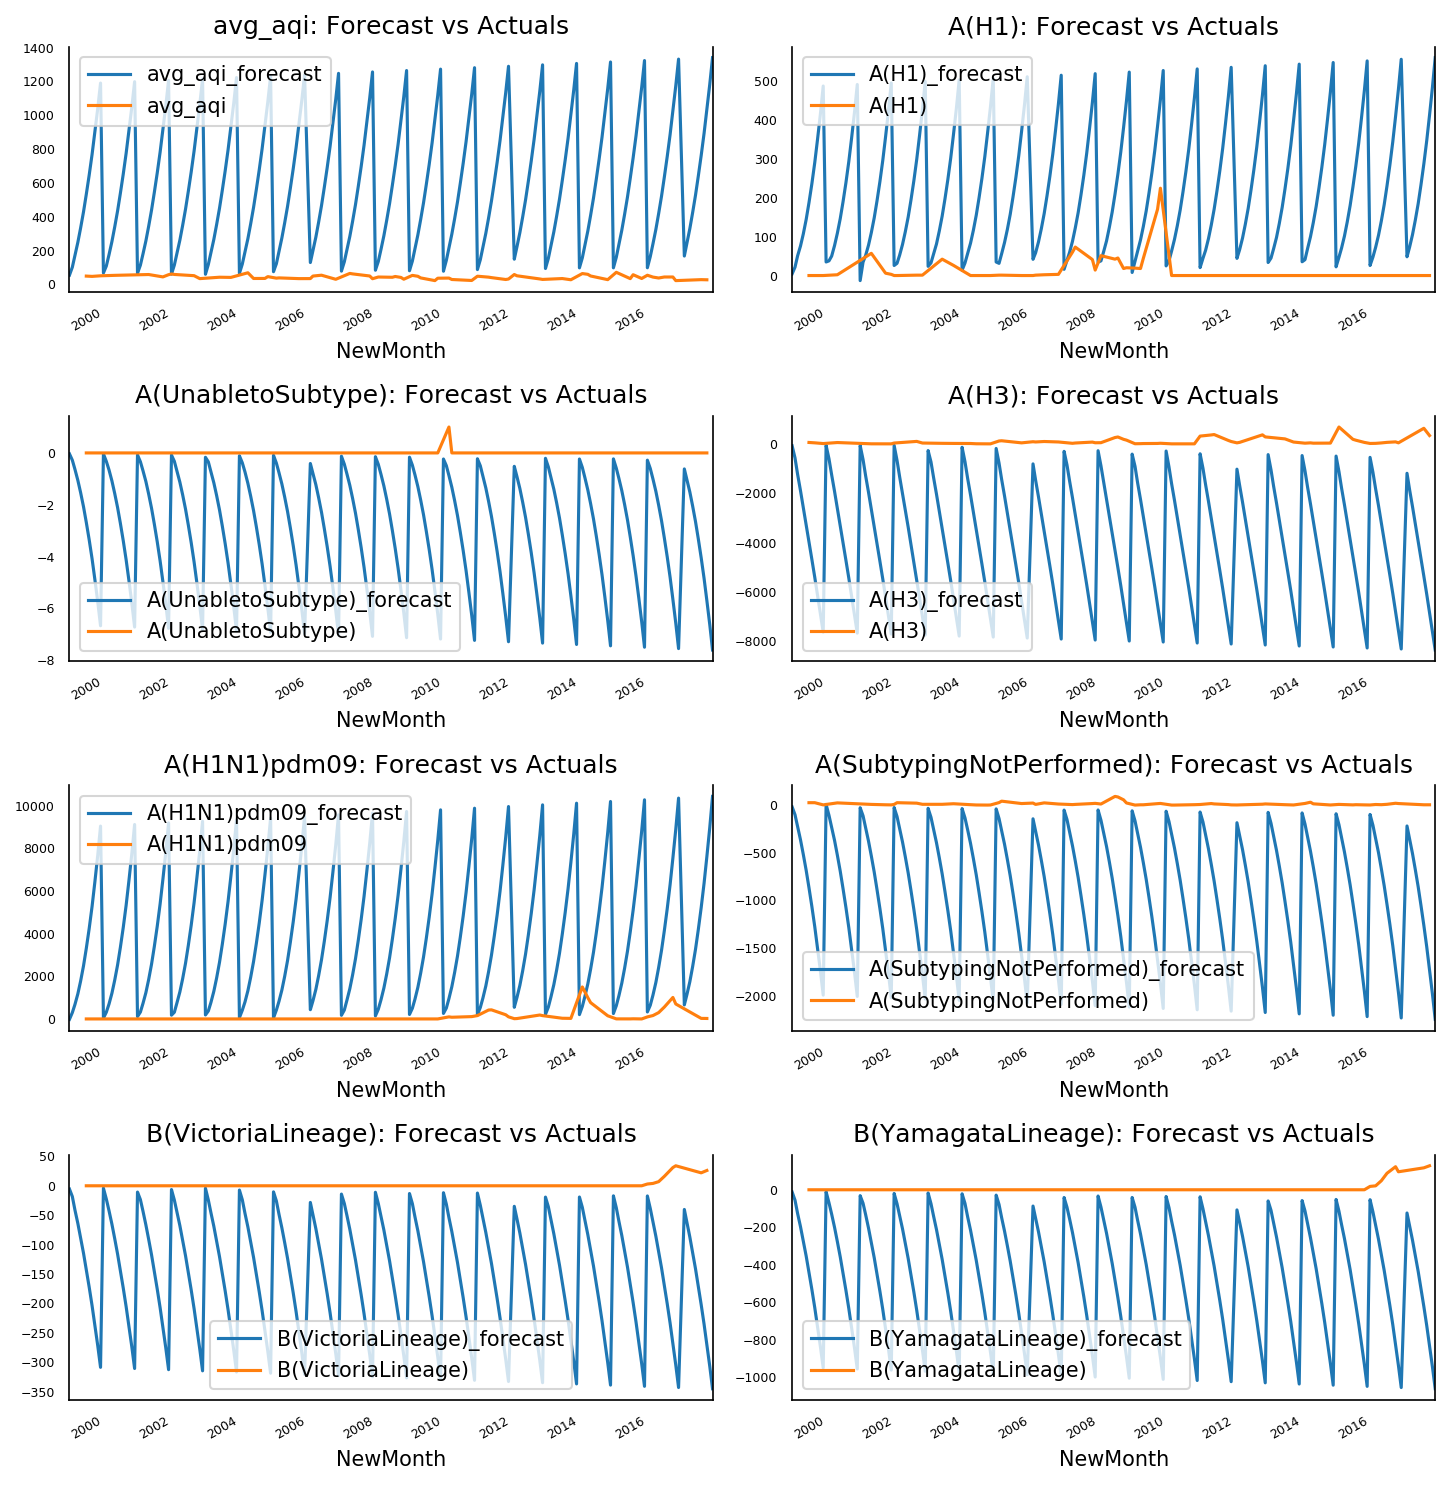

In [135]:
#plot forecast vs actual
df=merged_var
df_test=testData

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## Below code is reference from 

https://github.com/kidaufo/StatisticalModeling/blob/master/GLM.ipynb
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

In [55]:
# Poisson regression code

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

NameError: name 'uniform' is not defined

In [ ]:
# Normal distribution + log link function
from numpy.random import uniform, normal, poisson, binomial


np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)
exog, endog = sm.add_constant(x), y


mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [ ]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

In [ ]:
#logistic regression


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

exog, endog = sm.add_constant(X_train), y_train

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('logistic_regression.png')

In [ ]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

In [ ]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_data.png')

In [ ]:
exog = sm.add_constant(x)
endog = y

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")